AIM 9week exercise

instructor: JaKeoung Koo at Gachon University

# 1. Convergence of gradient descent

86.85516896350443
[86.85516896350443, 173.71033792700885, 347.4206758540177]
0.011513419545821031
0.005756709772910516
0.002878354886455258


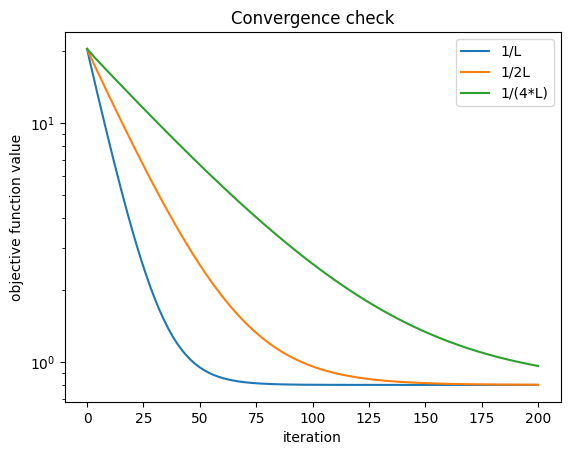

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix A
A = np.array([[-1, 2], [3, 4], [5, 6]])

# Define the vector b
b = np.array([7, 8, 9])

# Define the function to minimize
def f(x):
    return 0.5*np.sum((A.dot(x) - b)**2)

# Define the gradient of the function
def grad_f(x):
    return A.T.dot(A.dot(x) - b)

# Define the Lipschitz constant of the gradient
L = np.linalg.eigvals(A.T.dot(A))[-1]
print(L)

# Define the initial point
x0 = np.array([1.0, 1.0])

# Define the number of iterations
niter = 200

# Set the list of Lipschitz constant to be used
LL = [L, 2*L, 4*L]
print(LL)

plt.title(f"Convergence check")
plt.ylabel("objective function value")
plt.xlabel("iteration")

for L in LL:
  eta = 1.0 / L
  print(eta)
  x = x0.copy()

  # Store the history of iterates for plotting
  x_hist = [x0]
  f_hist = [f(x0)]

  for i in range(niter):
    x = x - eta * grad_f(x)
    x_hist.append(x)
    f_hist.append(f(x))

  plt.semilogy(f_hist)

plt.legend(["1/L", "1/2L", "1/(4*L)", "1/t"])

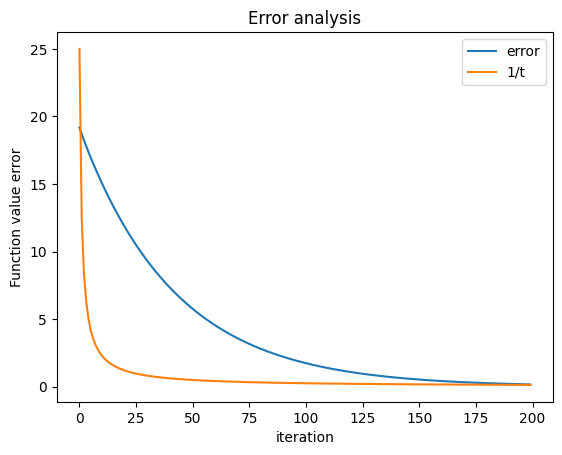

In [50]:
# Compute the solution by left inverse
x_ref = np.linalg.solve(A.T.dot(A), A.T.dot(b))
f_ref = f(x_ref)

eta = 1.0 / L
x = x0.copy()

# Store the history of iterates for plotting
x_hist = [x0]
error = [abs(f(x0) - f_ref)]

for i in range(niter):
  x = x - eta * grad_f(x)
  x_hist.append(x)
  error.append( abs(f(x)- f_ref) )

plt.title(f"Error analysis")
plt.ylabel("Function value error")
plt.xlabel("iteration")

plt.plot(error[1:])

plt.plot([ 50/(2*k) for k in range(1,niter+1) ])

plt.legend(["error", "1/t"])

In [29]:
error

[39.4,
 37.35787074836575,
 35.55029141407997,
 33.86250772695363,
 32.26294739862618,
 30.740969608968115,
 29.29129596631373,
 27.91011213845909,
 26.59408743940504,
 25.340124179507484,
 24.145289718009003,
 23.0067944403637,
 21.921981454207756,
 20.88831944124334,
 19.90339651368401,
 18.964914527258795,
 18.07068370408835,
 17.218617519532387,
 16.406727832739197,
 15.63312024745057,
 14.89598969171642,
 14.193616206074706,
 13.524360930336744,
 12.88666227960544,
 12.279032300602081,
 11.7000531997992,
 11.148374035258406,
 10.62270756445422,
 10.121827240728866,
 9.64456435136975,
 9.189805290631897,
 8.756488961342436,
 8.343604299024232,
 7.9501879127616775,
 7.5753218373040045,
 7.218131391161144,
 6.87778313569425,
 6.5534829304389675,
 6.244474080123744,
 5.950035569059675,
 5.669480378782145,
 5.402153885018798,
 5.147432330243378,
 4.904721368251541,
 4.673454677362578,
 4.453092639011253,
 4.243121078646498,
 4.043050065999022,
 3.85241277191858,
 3.670764379113429,
 3.

# 2. GD v.s. SGD v.s. Minibatch GD

Note that
$$\frac{1}{2}\|Ax-b\|_2^2 = \frac{1}{2} \sum_{i=1}^N (A_{i:}x-b_i)^2$$
where $A_{i:}$ is the $i$-th row of the matrix $A$.

batchsize: 2, niter_per_epoch: 3, nepoch: 333


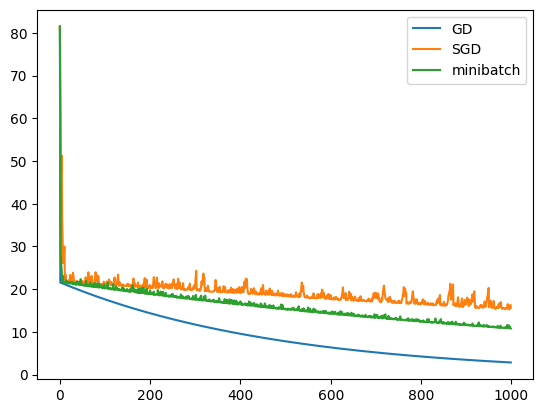

In [ ]:
# Define the matrix A of size [N x dim]
A = np.array([[1, 2], [3, 4], [5, 6], [7,8], [8,9], [10,11]])
N = A.shape[0] # N is the number of data

# Define the vector b
b = np.array([7, 8, 9, 10, 11, 12])

# Define the function to minimize
def f(x):
    return np.sum(0.5*(A.dot(x) - b)**2)

# Define the gradient of the function
def grad_f(x, B=None):
  if B is None:
    return A.T.dot(A.dot(x)-b)
  else:
    return A[B,:].T.dot(A[B,:].dot(x) - b[B])

L = np.linalg.eigvals(A.T.dot(A))[-1]
eta = 1.0 / L
niter = 999

methods = ["GD", "SGD", "minibatch"]
for imethod,method in enumerate(methods):
  x = x0.copy()

  # Store the history of iterates for plotting
  x_hist = [x0]
  f_hist = [f(x0)]

  if method == "GD":
    for i in range(niter):
      x = x - eta * grad_f(x)
      x_hist.append(x)
      f_hist.append(f(x))

  elif method == "SGD":
    for i in range(niter):
      x = x - eta * grad_f(x, np.random.randint(N))
      x_hist.append(x)
      f_hist.append(f(x))

  elif method == "minibatch":
    # nepoch * (N/batchsize) = niter
    batchsize = 2
    niter_per_epoch = N // batchsize
    nepoch = niter // niter_per_epoch

    eta2 = eta*2

    print(f"batchsize: {batchsize}, niter_per_epoch: {niter_per_epoch}, nepoch: {nepoch}")

    for epoch in range(nepoch):
      Nperm = np.random.permutation(N)
      for j in range(niter_per_epoch):
        idx_chosen = Nperm[j*batchsize:(j+1)*batchsize]
        x = x - eta2 * grad_f(x, idx_chosen) / batchsize
        x_hist.append(x)
        f_hist.append(f(x))


  plt.plot(f_hist)

plt.legend(methods)